In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import yfinance as yf

In [2]:
tickers=['AAPL','GOOG','C','DIS','F','MSFT','MS','GME','TSLA','AMZN']
start=dt.datetime(2019,1,1)
end=dt.datetime.now()

In [3]:
def getData(stocks, start, end):
    stockData = yf.download(stocks,start,end)['Adj Close']
    returns = stockData.pct_change()
    return stockData,returns

In [4]:
prices,returns =getData(tickers, start, end)
returns

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,C,DIS,F,GME,GOOG,MS,MSFT,TSLA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.025241,-0.018121,-0.024227,-0.015190,-0.007651,-0.028484,-0.017822,-0.036788,-0.031472
2019-01-04,0.042689,0.050064,0.048896,0.030847,0.038560,0.175019,0.053786,0.040826,0.046509,0.057697
2019-01-07,-0.002226,0.034353,0.008707,0.008667,0.025990,0.015748,-0.002167,0.009927,0.001276,0.054361
2019-01-08,0.019063,0.016612,-0.002697,0.007779,0.009650,0.021318,0.007385,-0.006233,0.007251,0.001164
...,...,...,...,...,...,...,...,...,...,...
2022-12-05,-0.007983,-0.033146,-0.033870,-0.035201,-0.034632,-0.071221,-0.009521,-0.024864,-0.018901,-0.063687
2022-12-06,-0.025370,-0.030326,-0.014461,-0.037944,-0.007474,-0.084898,-0.025633,-0.025610,-0.020304,-0.014415
2022-12-07,-0.013785,0.002380,-0.006892,-0.001517,-0.013554,-0.048311,-0.022197,-0.002628,-0.003060,-0.032143


In [5]:
weights = np.random.random(len(returns.columns))
weights

array([0.64221374, 0.49154817, 0.50865715, 0.41411624, 0.29114237,
       0.28747136, 0.87353515, 0.80444664, 0.32761584, 0.69265223])

In [6]:
weights = weights/np.sum(weights)
weights

array([0.1204136 , 0.09216415, 0.09537204, 0.07764584, 0.05458852,
       0.05390022, 0.16378583, 0.15083189, 0.06142722, 0.1298707 ])

In [7]:
returns['Portfolio'] =returns@weights
returns

,AAPL,AMZN,C,DIS,F,GME,GOOG,MS,MSFT,TSLA,Portfolio
Date,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.025241,-0.018121,-0.024227,-0.015190,-0.007651,-0.028484,-0.017822,-0.036788,-0.031472,-0.032872
2019-01-04,0.042689,0.050064,0.048896,0.030847,0.038560,0.175019,0.053786,0.040826,0.046509,0.057697,0.053669
2019-01-07,-0.002226,0.034353,0.008707,0.008667,0.025990,0.015748,-0.002167,0.009927,0.001276,0.054361,0.014950
2019-01-08,0.019063,0.016612,-0.002697,0.007779,0.009650,0.021318,0.007385,-0.006233,0.007251,0.001164,0.006715
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,-0.007983,-0.033146,-0.033870,-0.035201,-0.034632,-0.071221,-0.009521,-0.024864,-0.018901,-0.063687,-0.030451
2022-12-06,-0.025370,-0.030326,-0.014461,-0.037944,-0.007474,-0.084898,-0.025633,-0.025610,-0.020304,-0.014415,-0.026340
2022-12-07,-0.013785,0.002380,-0.006892,-0.001517,-0.013554,-0.048311,-0.022197,-0.002628,-0.003060,-0.032143,-0.013954


In [8]:
prices['Portfolio'] =prices@weights
prices

,AAPL,AMZN,C,DIS,F,GME,GOOG,MS,MSFT,TSLA,Portfolio
Date,,,,,,,,,,,
2019-01-02,38.105137,76.956497,46.672569,107.654343,7.018952,3.160276,52.292500,35.959782,96.874695,20.674667,47.669099
2019-01-03,34.309593,75.014000,45.826836,105.046211,6.912335,3.136097,50.803001,35.318916,93.310883,20.024000,46.098703
2019-01-04,35.774239,78.769501,48.067596,108.286606,7.178877,3.684974,53.535500,36.760860,97.650673,21.179333,48.212293
2019-01-07,35.694611,81.475502,48.486115,109.225136,7.365457,3.743005,53.419498,37.125797,97.775238,22.330667,48.771423
2019-01-08,36.375053,82.829002,48.355324,110.074753,7.436535,3.822798,53.813999,36.894375,98.484177,22.356667,49.116411
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,146.630005,91.010002,45.639999,95.930000,13.380000,25.559999,99.870003,89.809998,250.199997,182.449997,108.921035
2022-12-06,142.910004,88.250000,44.980000,92.290001,13.280000,23.389999,97.309998,87.510002,245.119995,179.820007,106.330910
2022-12-07,140.940002,88.459999,44.669998,92.150002,13.100000,22.260000,95.150002,87.279999,244.369995,174.039993,104.816687


In [9]:
last_price =prices['Portfolio'][-1]
last_price

105.8643899035825

In [10]:
#Number of Simulations
num_simulations =1000

#One year
num_days = 252

portfolio_sims = pd.DataFrame()
daily_vol = returns['Portfolio'].std()

In [11]:
for x in range(num_simulations):
    count = 0
    price_series = []
    
    #This will generate the first random price
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == (num_days-1):
            break
        #This will generate the rest random prices
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count = count+1
    
    portfolio_sims[x] = price_series

In [12]:
portfolio_sims

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,106.842254,108.597755,108.899268,110.369057,104.578995,105.801948,108.114943,105.124915,109.681415,105.620115,...,106.997104,107.668804,107.889216,105.390659,100.202756,105.790381,106.091704,100.857723,106.120292,105.912744
1,111.029381,105.940245,107.195251,110.948749,104.415685,103.141465,104.984725,104.185758,113.680301,106.967220,...,108.147977,108.102145,109.999388,103.299627,103.669188,105.428097,106.272925,99.620118,105.139052,106.174131
2,112.180001,102.242166,104.877418,107.658996,107.329889,101.847833,104.876355,103.312278,118.795485,109.052349,...,110.990690,106.781305,108.994144,101.596495,101.679771,105.009069,105.311732,97.196301,108.454786,106.582605
3,111.744491,106.091175,103.447120,107.921617,108.504424,101.631605,105.449201,101.062941,116.360243,110.173068,...,108.827064,105.694227,111.197643,104.129579,106.521699,104.546168,103.292084,97.944587,107.284924,105.710685
4,117.380233,111.804929,101.205347,108.002162,107.129155,103.725840,101.252770,100.855867,116.231106,109.860607,...,110.024370,109.891017,110.327659,104.785853,108.364905,104.294404,103.535397,99.356287,106.890801,105.008219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,65.249302,123.453545,85.901952,123.685813,61.242696,72.637905,72.243324,84.060572,98.963438,61.963972,...,112.927359,122.708705,102.885132,125.165764,73.872744,89.906064,84.278299,138.780065,117.387874,129.058125
248,63.562047,124.186270,83.537534,121.187657,60.204345,74.353626,70.818328,82.626223,97.000427,60.629566,...,112.056710,119.851460,105.465037,125.801349,74.129418,88.629968,86.216529,140.890573,116.221911,129.941543
249,64.999275,124.469086,84.830295,125.074846,60.629175,73.911268,70.529030,83.268016,101.019103,60.898493,...,113.117809,117.686355,105.954766,126.656623,74.971041,86.596235,86.114964,145.967972,116.237236,129.860900
250,64.082748,126.462740,84.226575,123.248044,58.625822,74.110756,67.521433,81.775074,101.435262,63.838818,...,112.484710,116.742067,106.917781,127.337612,75.618032,87.909937,88.278044,143.369662,115.820668,127.644161


In [13]:
portfolio_sims[0]

0      106.842254
1      111.029381
2      112.180001
3      111.744491
4      117.380233
          ...    
247     65.249302
248     63.562047
249     64.999275
250     64.082748
251     62.530465
Name: 0, Length: 252, dtype: float64

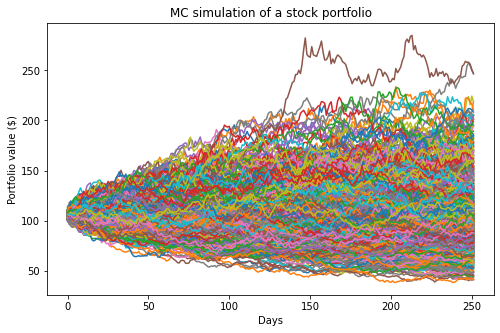

In [14]:
plt.figure(figsize=(8,5))
plt.plot(portfolio_sims)
plt.ylabel('Portfolio value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [15]:
#If you want 90% VaR, you should enter alpha=10
#If you want 99% VaR, you should enter alpha=1
def VaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the percentile of the distribution at the given alpha confidence level
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    
   
    elif isinstance(returns, pd.DataFrame):
        
         # A passed user-defined-function will be passed a Series for evaluation.
        return returns.aggregate(VaR, alpha=alpha)
    
    else:
        raise TypeError("Expected returns to be dataframe or series")

In [16]:
portfolio_returns=portfolio_sims.pct_change()
portfolio_returns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.039190,-0.024471,-0.015648,0.005252,-0.001562,-0.025146,-0.028953,-0.008934,0.036459,0.012754,...,0.010756,0.004025,0.019559,-0.019841,0.034594,-0.003425,0.001708,-0.012271,-0.009246,0.002468
2,0.010363,-0.034907,-0.021623,-0.029651,0.027910,-0.012542,-0.001032,-0.008384,0.044996,0.019493,...,0.026285,-0.012218,-0.009139,-0.016487,-0.019190,-0.003975,-0.009045,-0.024331,0.031537,0.003847
3,-0.003882,0.037646,-0.013638,0.002439,0.010943,-0.002123,0.005462,-0.021772,-0.020499,0.010277,...,-0.019494,-0.010180,0.020217,0.024933,0.047619,-0.004408,-0.019178,0.007699,-0.010787,-0.008181
4,0.050434,0.053857,-0.021671,0.000746,-0.012675,0.020606,-0.039796,-0.002049,-0.001110,-0.002836,...,0.011002,0.039707,-0.007824,0.006302,0.017304,-0.002408,0.002356,0.014413,-0.003674,-0.006645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.007509,0.025137,0.001036,0.019629,-0.005283,0.043103,-0.026035,-0.018115,-0.029979,-0.013494,...,0.035644,0.009882,0.044601,-0.031472,0.002372,-0.026016,-0.002797,0.005516,-0.001895,-0.023281
248,-0.025859,0.005935,-0.027525,-0.020198,-0.016955,0.023620,-0.019725,-0.017063,-0.019836,-0.021535,...,-0.007710,-0.023285,0.025076,0.005078,0.003475,-0.014194,0.022998,0.015208,-0.009933,0.006845
249,0.022611,0.002277,0.015475,0.032076,0.007056,-0.005949,-0.004085,0.007767,0.041429,0.004436,...,0.009469,-0.018065,0.004644,0.006799,0.011353,-0.022946,-0.001178,0.036038,0.000132,-0.000621
250,-0.014101,0.016017,-0.007117,-0.014606,-0.033043,0.002699,-0.042643,-0.017929,0.004120,0.048282,...,-0.005597,-0.008024,0.009089,0.005377,0.008630,0.015170,0.025119,-0.017801,-0.003584,-0.017070


In [17]:
portfolio_returns=portfolio_returns.dropna()
portfolio_returns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1,0.039190,-0.024471,-0.015648,0.005252,-0.001562,-0.025146,-0.028953,-0.008934,0.036459,0.012754,...,0.010756,0.004025,0.019559,-0.019841,0.034594,-0.003425,0.001708,-0.012271,-0.009246,0.002468
2,0.010363,-0.034907,-0.021623,-0.029651,0.027910,-0.012542,-0.001032,-0.008384,0.044996,0.019493,...,0.026285,-0.012218,-0.009139,-0.016487,-0.019190,-0.003975,-0.009045,-0.024331,0.031537,0.003847
3,-0.003882,0.037646,-0.013638,0.002439,0.010943,-0.002123,0.005462,-0.021772,-0.020499,0.010277,...,-0.019494,-0.010180,0.020217,0.024933,0.047619,-0.004408,-0.019178,0.007699,-0.010787,-0.008181
4,0.050434,0.053857,-0.021671,0.000746,-0.012675,0.020606,-0.039796,-0.002049,-0.001110,-0.002836,...,0.011002,0.039707,-0.007824,0.006302,0.017304,-0.002408,0.002356,0.014413,-0.003674,-0.006645
5,0.017056,0.032336,-0.004302,0.006423,-0.018241,0.003727,-0.012798,0.029811,0.045684,0.008594,...,0.021248,0.021315,0.011170,0.012070,-0.003781,0.001614,-0.003940,-0.032463,0.008337,0.016624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.007509,0.025137,0.001036,0.019629,-0.005283,0.043103,-0.026035,-0.018115,-0.029979,-0.013494,...,0.035644,0.009882,0.044601,-0.031472,0.002372,-0.026016,-0.002797,0.005516,-0.001895,-0.023281
248,-0.025859,0.005935,-0.027525,-0.020198,-0.016955,0.023620,-0.019725,-0.017063,-0.019836,-0.021535,...,-0.007710,-0.023285,0.025076,0.005078,0.003475,-0.014194,0.022998,0.015208,-0.009933,0.006845
249,0.022611,0.002277,0.015475,0.032076,0.007056,-0.005949,-0.004085,0.007767,0.041429,0.004436,...,0.009469,-0.018065,0.004644,0.006799,0.011353,-0.022946,-0.001178,0.036038,0.000132,-0.000621
250,-0.014101,0.016017,-0.007117,-0.014606,-0.033043,0.002699,-0.042643,-0.017929,0.004120,0.048282,...,-0.005597,-0.008024,0.009089,0.005377,0.008630,0.015170,0.025119,-0.017801,-0.003584,-0.017070


In [18]:
#This is to check the 95% values of each simulation
VaR(portfolio_returns, alpha=5)

0     -0.031900
1     -0.027603
2     -0.034391
3     -0.032513
4     -0.031195
         ...   
995   -0.033021
996   -0.030027
997   -0.031816
998   -0.029637
999   -0.032287
Length: 1000, dtype: float64

In [19]:
VaR(portfolio_returns[0], alpha=5)

-0.031899829817862935

In [20]:
# 100 days
Time = 100
VaR(portfolio_returns[0], alpha=5)*np.sqrt(Time)

-0.31899829817862935

In [21]:
VaR(portfolio_returns, alpha=5)*np.sqrt(Time)

0     -0.318998
1     -0.276031
2     -0.343906
3     -0.325128
4     -0.311951
         ...   
995   -0.330214
996   -0.300272
997   -0.318164
998   -0.296369
999   -0.322873
Length: 1000, dtype: float64

In [22]:
InitialInvestment = 10000
print('Value at Risk 95th CI    :      ', round(InitialInvestment*-VaR(portfolio_returns[0], alpha=5)*np.sqrt(Time),2))

Value at Risk 95th CI    :       3189.98


In [23]:
VaR(portfolio_returns, alpha=5)*np.sqrt(Time)*InitialInvestment

0     -3189.982982
1     -2760.309947
2     -3439.057164
3     -3251.279796
4     -3119.512496
          ...     
995   -3302.141888
996   -3002.721114
997   -3181.640698
998   -2963.687741
999   -3228.732999
Length: 1000, dtype: float64